## Problem Statement:
The CarDekho company maintains a database of the cars sold through their platform. The data represents the cars sold by Car Dekho and the car related features. We have to build a linear regression model to predict the Selling price of the car. Calculate all the error metrics and diagnostic plots to check the regression result. The dataset contains data for around 301 cars sold by CarDekho.

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import OLSInfluence

## Read the cars dataset

In [26]:
car = pd.read_csv("car data.csv")

In [27]:
car.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


## Exploratory Data Analysis (EDA) 

Data quality check

In [28]:
print(car.info())
print(car.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       

Check for missing values

In [29]:
print(car.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


Correlation matrix to identify linear relationships

C:\Users\Akshit\AppData\Local\Temp\ipykernel_6940\2298250805.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = car.corr()


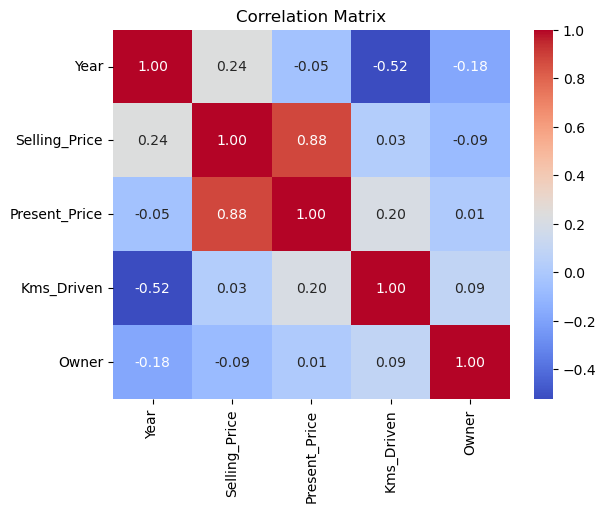

In [30]:
correlation_matrix = car.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Transform the categorical data.

In [31]:
car_final = car.drop(['Car_Name','Selling_Price'], axis =1)

In [32]:
car_final = pd.get_dummies(car_final)
car_final.shape
car_final.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,0,0,1,1,0,0,1
1,2013,9.54,43000,0,0,1,0,1,0,0,1
2,2017,9.85,6900,0,0,0,1,1,0,0,1
3,2011,4.15,5200,0,0,0,1,1,0,0,1
4,2014,6.87,42450,0,0,1,0,1,0,0,1


## Multiple Linear Regression model

In [44]:
model = LinearRegression()
X = car_final
X = stats.zscore(X)
X = sm.add_constant(X)
y = car['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

res = sm.OLS(y_train, X_train).fit()
model.fit(X_train, y_train)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.48e-105
Time:                        19:52:31   Log-Likelihood:                -470.11
No. Observations:                 240   AIC:                             958.2
Df Residuals:                     231   BIC:                             989.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4

## Feature Importance

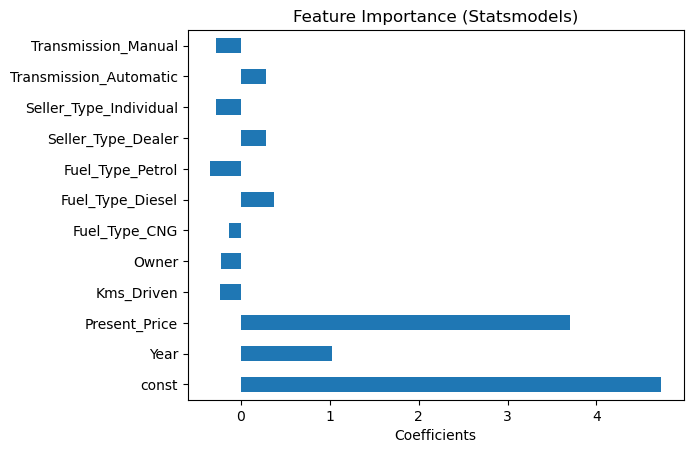

In [45]:
feature_importance = pd.Series(res.params)
feature_importance.plot(kind='barh')
plt.title('Feature Importance (Statsmodels)')
plt.xlabel('Coefficients')
plt.show()

## Visualize the diagnostic plots

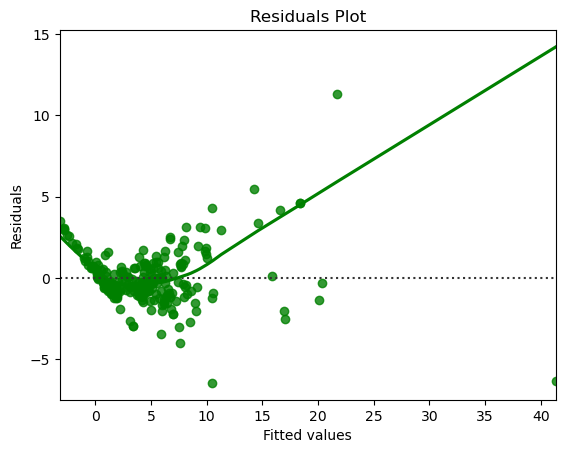

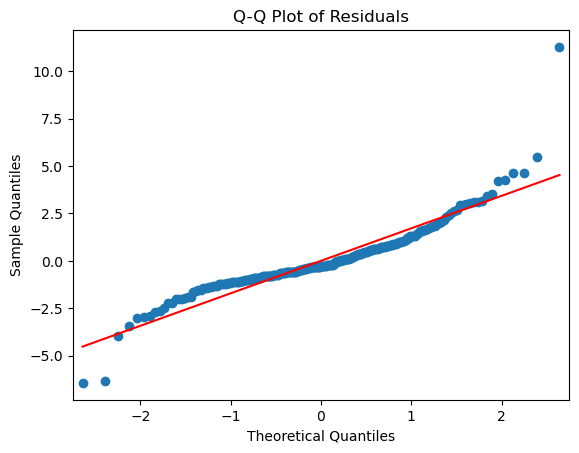

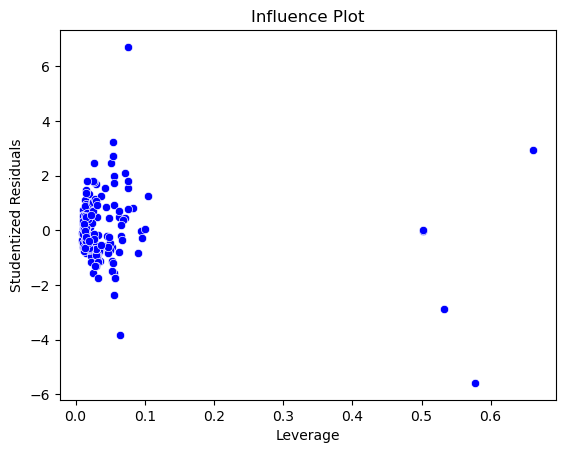

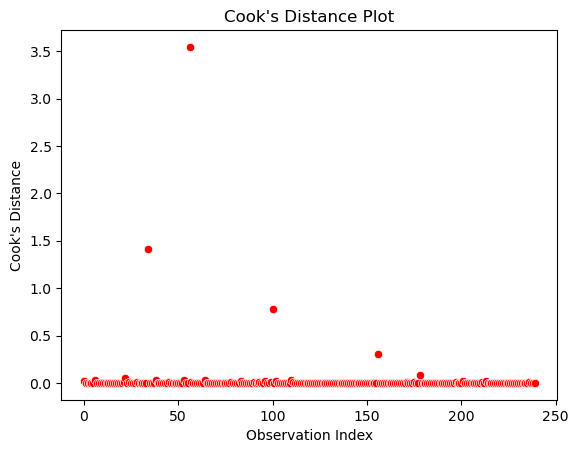

In [71]:

# Predictions on the training set
y_train_pred = res.predict(X_train_stats)

# Residuals plot
residuals_stats = y_train - y_train_pred
sns.residplot(x=y_train_pred, y=residuals_stats, lowess=True, color="g")
plt.title('Residuals Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Q-Q Plot

sm.qqplot(residuals_stats, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Influence Plot
influence_stats = OLSInfluence(res)
leverage_stats = influence_stats.hat_matrix_diag
residuals_studentized_stats = influence_stats.resid_studentized_internal
sns.scatterplot(x=leverage_stats, y=residuals_studentized_stats, color="blue")
plt.title('Influence Plot')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
plt.show()

# Cook's Distance Plot
cook_distance_stats = influence_stats.cooks_distance[0]
sns.scatterplot(x=np.arange(len(cook_distance_stats)), y=cook_distance_stats, color="red")
plt.title("Cook's Distance Plot")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.show()
